##  <font color='#4cc9f0'>__Music Taste and Mental Health__</font>
### <font color = '#c3b1e1'> *Zara Farrukh* </font>

### <font color='#4cc9f0'>__Introduction__</font>

I conducted an analysis that focused on exploring various aspects, such as interests in music genres, listening habits, and their respective anxiety, depression, insomnia, and Obstructive Compulsive Disorder (OCD) levels. I then interpreted the impacts of music on these mental health indicators. This dataset, which I __obtained from Kaggle__, provides valuable insights into the relationships between demographic information, music preferences, and mental well-being. The goal is to unravel patterns and connections within the data. The precise recording of this dataset is crucial for future analyses, seeking to enhance our understanding of the major factors influencing mental health indicators. With this the question of interest that might emerge is: _Are there associations between specific music genres and levels of anxiety, depression, insomnia, or OCD?_ Perhaps, we can predict mental health conditions using music taste. Addressing this type of questions is essential for uncovering the nuanced links between music choices and mental health consequences.

### <font color='#4cc9f0'>__Analyses__</font>

### <font color = '#c3b1e1'>- Data Loading</font>

Extracting information on music choice, mental well-being and other various factors by reading the CSV file

In [1]:
#Importing data
import pandas as pd 
df = pd.read_csv('mxmh_survey_results.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#### <font color = '#c3b1e1'>- Data cleaning </font>

Refine grammar and fix title capitalization

In [2]:
# Refine grammar in Music Effects column
df['Music effects'] = df['Music effects'].replace({'Improve': 'Improves', 'Worsen': 'Worsens'})

# Capitalize the first letter of each word in column titles
df.columns = df.columns.str.title()

# Adjust the capitalization for the "OCD" and "BPM" column to be all caps
df.rename(columns={'Ocd': 'OCD' , 'Bpm' : 'BPM'}, inplace=True)


# Print the cleaned DataFrame
df

,Timestamp,Age,Primary Streaming Service,Hours Per Day,While Working,Instrumentalist,Composer,Fav Genre,Exploratory,Foreign Languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video Game Music],Anxiety,Depression,Insomnia,OCD,Music Effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improves,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improves,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improves,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improves,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improves,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improves,I understand.


### <font color = '#c3b1e1'>- Manipulation</font>

Creating another column to calculate Total Mental Health Score for each listener.

**Average Mental Health Score (MHS)** for the purpose of this dataset is a calculated metric representing the mean of mental health-related scores, including depression, insomnia, anxiety, and OCD, for each individual within the dataset. It provides a normalized measure by distributing the impact of each condition equally. __A higher average mental health score is indicative of poorer mental health.__

In [3]:
#Total Mental Health Score is the sum of anxiety, depression, insomnia and OCD levels
df['Average Mental Health Score'] = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean(axis=1)
df

,Timestamp,Age,Primary Streaming Service,Hours Per Day,While Working,Instrumentalist,Composer,Fav Genre,Exploratory,Foreign Languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video Game Music],Anxiety,Depression,Insomnia,OCD,Music Effects,Permissions,Average Mental Health Score
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,1.00
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,3.00
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,6.50
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improves,I understand.,5.50
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improves,I understand.,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improves,I understand.,5.50
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improves,I understand.,3.00
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improves,I understand.,2.00
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improves,I understand.,2.00


Display Fav Genre, Anxiety, Depression, Insomnia, OCD and Mental Health Score columns

In [4]:
column_indices = [7, 27, 28, 29, 30, 33]

# Create a DataFrame with only the selected columns
columns_df = df.iloc[:, column_indices]

# Display the DataFrame
columns_df

,Fav Genre,Anxiety,Depression,Insomnia,OCD,Average Mental Health Score
0,Latin,3.0,0.0,1.0,0.0,1.00
1,Rock,7.0,2.0,2.0,1.0,3.00
2,Video game music,7.0,7.0,10.0,2.0,6.50
3,Jazz,9.0,7.0,3.0,3.0,5.50
4,R&B,7.0,2.0,5.0,9.0,5.75
...,...,...,...,...,...,...
731,Rock,7.0,6.0,0.0,9.0,5.50
732,Pop,3.0,2.0,2.0,5.0,3.00
733,Rap,2.0,2.0,2.0,2.0,2.00
734,Classical,2.0,3.0,2.0,1.0,2.00


Extracting genres with total Average Mental Health Scores sorted in descending order to generate plot

In [5]:
# Group by 'Fav Genre' and calculate the sum of 'Mental Health Score' for each genre
avg_scores_by_genre = df.groupby('Fav Genre')['Average Mental Health Score'].sum()

# Convert the result to a DataFrame and reset the index
avg_scores = avg_scores_by_genre.reset_index()

# Rename the column as its a sum of average scores
avg_scores.rename(columns={'Average Mental Health Score': 'Total Average MHS'}, inplace=True)

# Sort the DataFrame by 'Total average MHS' in descending order
avg_scores_sorted = avg_scores.sort_values(by='Total Average MHS', ascending=False)

# Display the DataFrame
avg_scores_sorted

,Fav Genre,Total Average MHS
14,Rock,842.125
11,Pop,478.375
10,Metal,391.250
0,Classical,200.500
15,Video game music,184.250
2,EDM,163.750
5,Hip hop,158.750
3,Folk,131.000
12,R&B,128.000
7,K pop,108.250


### <font color = '#c3b1e1'>- Plot Generation</font>

Importing library for generating the above dataframe plot, setting plot style

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style of the plot
sns.set_theme(style="whitegrid")

Setting plot size and creating Bar Graph to show the vast difference between Mental Health Scores

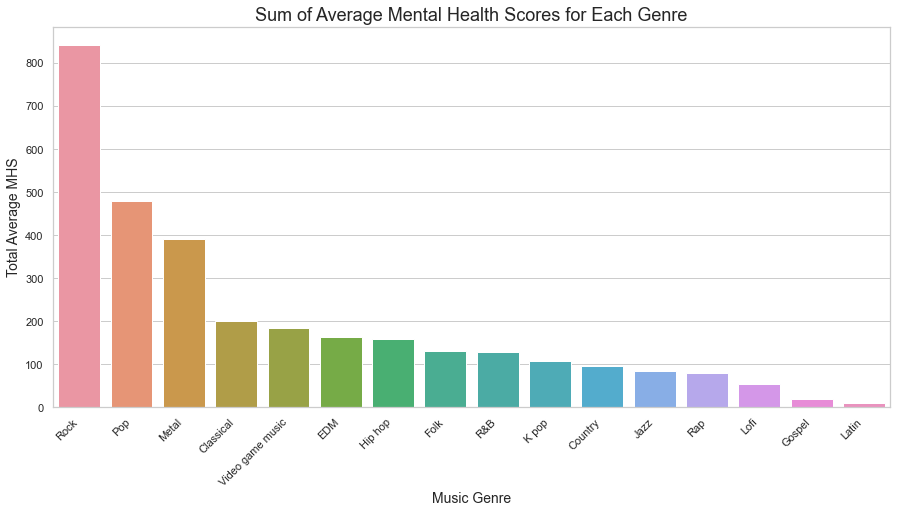

In [7]:
plt.figure(figsize=(15, 7))

# Create a bar plot using seaborn
sns.barplot(x='Fav Genre', y='Total Average MHS', data=avg_scores_sorted)

# Set labels and title
plt.xlabel("Music Genre", size=14)
plt.ylabel("Total Average MHS", size=14)
plt.title("Sum of Average Mental Health Scores for Each Genre", size=18)

# Rotate labels for better readability
plt.xticks(rotation=45, ha="right")

# Saving the plot as an image file
plt.savefig("avg_mental_health_scores_by_genre.png")

# Showplot
plt.show()

Calculating average OCD scores for each category value of Hours Per Day then generating plot

In [8]:
# Calculate the average depression score for each category of Hours Per Day
average_OCD_scores = df.groupby('Hours Per Day')['OCD'].mean().reset_index()

Generating plot to analyze the correlation between listening frequency and OCD score

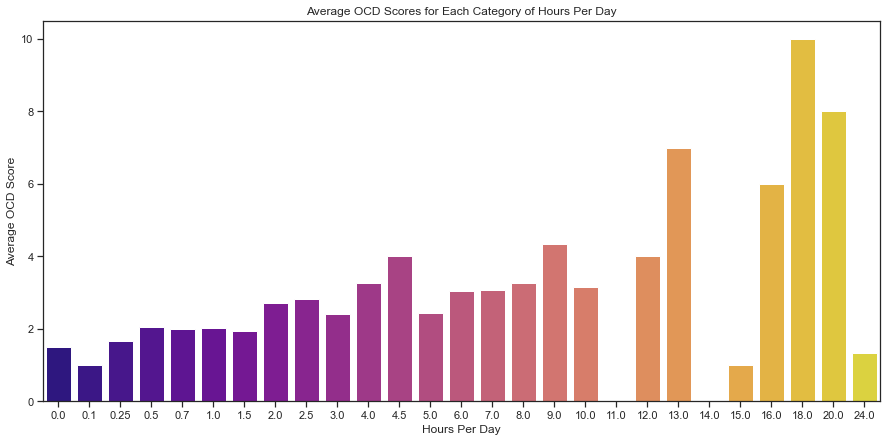

In [9]:
# Color palette
custom_palette = sns.color_palette("plasma", n_colors=len(average_OCD_scores))
sns.set_theme(style="ticks")

# Bar chart showing the average depression scores for each category of Hours Per Day listening to music
plt.figure(figsize=(15, 7))
sns.barplot(x='Hours Per Day', y='OCD', data=average_OCD_scores, palette=custom_palette)
plt.title('Average OCD Scores for Each Category of Hours Per Day')
plt.xlabel('Hours Per Day')
plt.ylabel('Average OCD Score')
plt.show()

Now calculating average depression scores for each category value of Hours Per Day then generating plot

In [10]:
# Calculate the average depression score for each category of Hours Per Day
average_depression_scores = df.groupby('Hours Per Day')['Depression'].mean().reset_index()

Generating plot to see how the correlation between listening frequency vs OCD score, and listening frequency vs depression score is similar

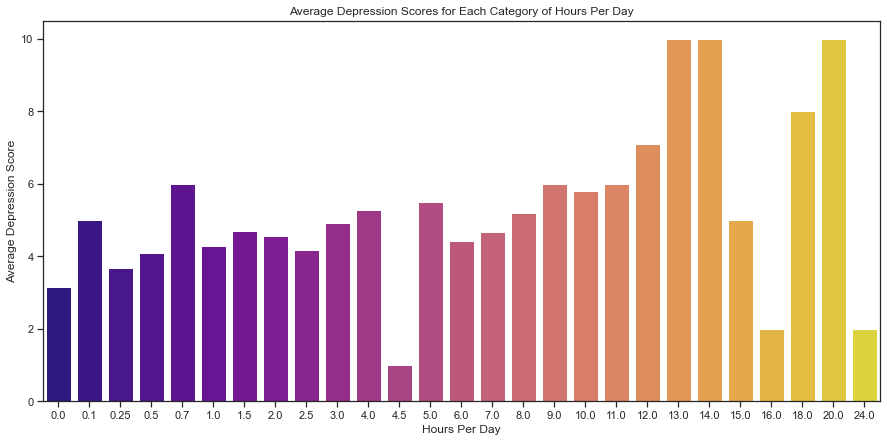

In [11]:
# Color palette
custom_palette = sns.color_palette("plasma", n_colors=len(average_depression_scores))
sns.set_theme(style="ticks")

# Bar chart showing the average depression scores for each category of Hours Per Day listening to music
plt.figure(figsize=(15, 7))
sns.barplot(x='Hours Per Day', y='Depression', data=average_depression_scores, palette=custom_palette)
plt.title('Average Depression Scores for Each Category of Hours Per Day')
plt.xlabel('Hours Per Day')
plt.ylabel('Average Depression Score')
plt.show()

Setting a threshold for high anxiety scores. With 10 being the maximum score, _scores above 5 would mean a high anxiety level._

In [12]:
high_anxiety_threshold = 5
# Create a new column indicating whether the depression score is high or not
df['Anxiety Score'] = df['Anxiety'] > high_anxiety_threshold

Generating bar chart to see how music affects people with different anxiety scores

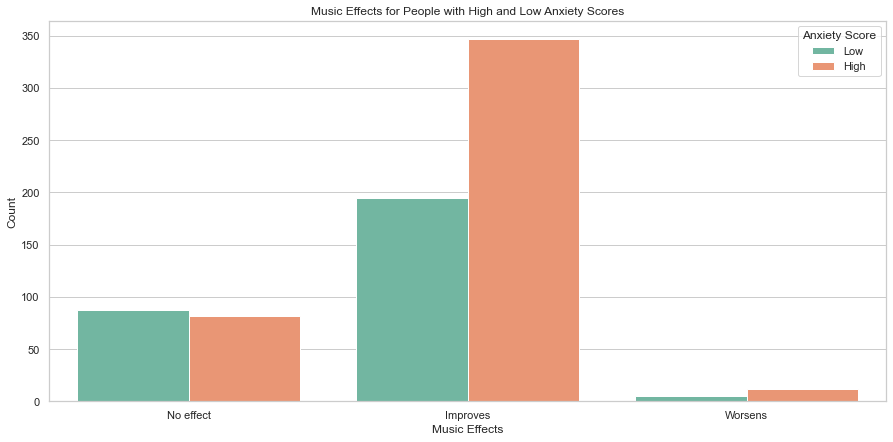

In [13]:
# Map True/False to High/Low
df['Anxiety Score'] = df['Anxiety Score'].map({True: 'High', False: 'Low'})

# Set style and context using Seaborn (optional)
sns.set(style="whitegrid")
sns.set_context("notebook")

# Create a bar plot
plt.figure(figsize=(15, 7))
sns.countplot(x='Music Effects', hue='Anxiety Score', data=df, palette='Set2')

# Add labels and title
plt.title('Music Effects for People with High and Low Anxiety Scores')
plt.xlabel('Music Effects')
plt.ylabel('Count')

# Show the plot
plt.show()

### <font color='#4cc9f0'>__Discussion__</font>

__Total Average MHS Score for Each Genre:__

Rock has the <font color='#c3b1e1'>__highest total average__</font> Mental Health Score (MHS) among the genres, indicating that individuals with a preference for Rock music tend to have a higher cumulative score across various mental health indicators. This could be explained by the fact that Rock music is known for its <font color='#c3b1e1'>energetic and empowering</font> qualities. The <font color='#c3b1e1'>upbeat and powerful rhythms</font>, along with strong lyrics, may resonate with individuals, providing a sense of energy and empowerment. This can highly influence mental states.

Pop and Metal follow with the second and third highest total average MHS, respectively.


Genres like Gospel, Lofi, Latin had relatively low scores <font color='#c3b1e1'>(< 60.0)</font> due to a number of possible reasons:

- __Gospel & Latin__ music may evoke a range of emotions, and some individuals may find it <font color='#c3b1e1'>calming</font>, while others might perceive it as less engaging or relevant to their emotional state.
- __Lofi & Jazz__ is often used for <font color='#c3b1e1'>relaxation and background ambiance</font>. Its effects can be soothing, and does not provide the same level of stimulation as other genres.

- __Genre-Stress Relationship__: Some genres are more effective in providing <font color='#c3b1e1'>stress relief</font> or <font color='#c3b1e1'>promoting a positive mental state</font>, contributing to lower mental health scores.

- __Cultural and Personal Influences__: Genres like gospel may have specific <font color='#c3b1e1'>cultural associations</font> that impact how individuals <font color='#c3b1e1'>perceive</font> and interact with the music.


__Relationship Between OCD Levels and Listening Hours:__

According to the bar chart, there is a gradual increase trend in OCD levels proving there is an observable relationship between higher OCD levels and more listening hours. Individuals with higher OCD scores tend to spend more time listening to music.
This suggests a potential <font color='#c3b1e1'>coping mechanism</font> or behavioral pattern where those individuals <font color='#c3b1e1'>find solace or distraction in music</font>, leading to increased listening hours, with the highest score being around 10.0 at 18 listening hours per day. While the trend isn't truly consistent (example at 24h, average OCD score is quiet low around 1.0), the gradual trend is enough to say there is a <font color='#c3b1e1'>positive correlation.</font>

What's more interesting is despite OCD and Depression being completely different types of disorders, the bar chart for Depression vs Listening Hours is almost identical to OCD vs Listening Hours which suggests similar reasonings.

__Effect of Music on Anxiety Levels:__

As shown using bar plot, most people with <font color='#c3b1e1'>higher anxiety scores reported feeling improved</font> after listening to music.
Naturally, individuals with <font color='#c3b1e1'>higher anxiety scores felt much better</font> with music compared to those with <font color='#c3b1e1'>lower anxiety scores.</font>
This suggests that music has a more <font color='#c3b1e1'>__pronounced positive impact__</font> on individuals with higher anxiety levels.

__Conclusion:__

These findings suggest that music preferences and listening habits may play a role in mental well-being, providing potential insights for further research or personalized interventions for mental health support. The diverse impact of music on mental health is evident in the varying scores associated with different genres. Rock, with its <font color='#c3b1e1'>emotive and empowering qualities, shows higher scores</font>, while classical, lofi, and gospel exhibit lower ones. This underscores the <font color='#c3b1e1'>complex relationship between musical preferences and emotional well-being</font>, shaped by individual responses, cultural influences, and personal connections.
Moreover, the analysis hints at the <font color='#c3b1e1'>__intriguing possibility of predicting mental states__ based on musical preferences</font>. Exploring this connection further could unravel valuable insights into the predictive role of music in understanding and assessing emotional well-being, paving the way for future research at the intersection of music and mental health.

### <font color='#4cc9f0'>__References__</font>

_Data Set:_

- Catherine R. (2022). Music & Mental Health Survey. Kaggle. Retrieved November 20, 2023, from 
    https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

_Packages:_

- McKinney, W. (2020). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference. https://doi.org/10.5281/zenodo.3509134

- Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering. https://doi.org/10.1109/MCSE.2007.55

- Waskom, M., et al. (2021). seaborn: statistical data visualization. Journal of Open Source Software. https://doi.org/10.21105/joss.03021